#### sklearn.discriminant_analysis.LinearDiscriminantAnalysis

* class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)

Parameters:

**solver**{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’

Solver to use, possible values:

-   ‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
    
-   ‘lsqr’: Least squares solution. Can be combined with shrinkage or custom covariance estimator.
    
-   ‘eigen’: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.
    

Changed in version 1.2: `solver="svd"`  now has experimental Array API support. See the  [Array API User Guide](https://scikit-learn.org/stable/modules/array_api.html#array-api)  for more details.

**shrinkage**‘auto’ or float, default=None

Shrinkage parameter, possible values:

-   None: no shrinkage (default).
    
-   ‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
    
-   float between 0 and 1: fixed shrinkage parameter.
    

This should be left to None if  `covariance_estimator`  is used. Note that shrinkage works only with ‘lsqr’ and ‘eigen’ solvers.

**priors**array-like of shape (n_classes,), default=None

The class prior probabilities. By default, the class proportions are inferred from the training data.

**n_components**int, default=None

Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features). This parameter only affects the  `transform`  method.

**store_covariance**bool, default=False

If True, explicitly compute the weighted within-class covariance matrix when solver is ‘svd’. The matrix is always computed and stored for the other solvers.

In [2]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


In [4]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(iris_scaled,iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda)

[[ 8.06179978e+00  3.00420621e-01]
 [ 7.12868772e+00 -7.86660426e-01]
 [ 7.48982797e+00 -2.65384488e-01]
 [ 6.81320057e+00 -6.70631068e-01]
 [ 8.13230933e+00  5.14462530e-01]
 [ 7.70194674e+00  1.46172097e+00]
 [ 7.21261762e+00  3.55836209e-01]
 [ 7.60529355e+00 -1.16338380e-02]
 [ 6.56055159e+00 -1.01516362e+00]
 [ 7.34305989e+00 -9.47319209e-01]
 [ 8.39738652e+00  6.47363392e-01]
 [ 7.21929685e+00 -1.09646389e-01]
 [ 7.32679599e+00 -1.07298943e+00]
 [ 7.57247066e+00 -8.05464137e-01]
 [ 9.84984300e+00  1.58593698e+00]
 [ 9.15823890e+00  2.73759647e+00]
 [ 8.58243141e+00  1.83448945e+00]
 [ 7.78075375e+00  5.84339407e-01]
 [ 8.07835876e+00  9.68580703e-01]
 [ 8.02097451e+00  1.14050366e+00]
 [ 7.49680227e+00 -1.88377220e-01]
 [ 7.58648117e+00  1.20797032e+00]
 [ 8.68104293e+00  8.77590154e-01]
 [ 6.25140358e+00  4.39696367e-01]
 [ 6.55893336e+00 -3.89222752e-01]
 [ 6.77138315e+00 -9.70634453e-01]
 [ 6.82308032e+00  4.63011612e-01]
 [ 7.92461638e+00  2.09638715e-01]
 [ 7.99129024e+00  8

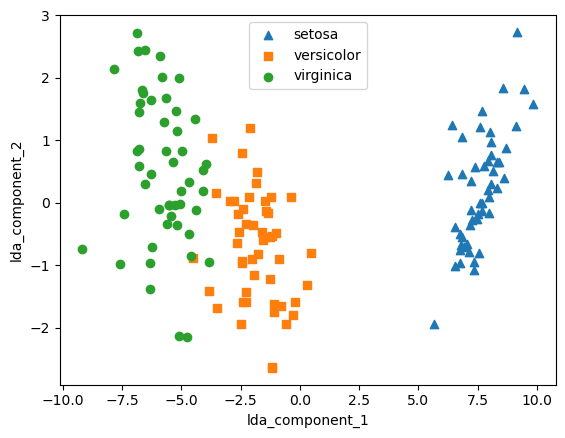

In [6]:
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1','lda_component_2']

iris_df_lda = pd.DataFrame(iris_lda,columns=lda_columns)
iris_df_lda['target'] = iris.target

markers=['^','s','o']

for i ,marker in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_component_1']
    y_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])